In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [72]:
#pip install plotly ipywidgets

# 1.Statistiques descriptives
## 1.1 Prix des maisons
### 1.1.1 land-registry-house-prices-borough

In [44]:
medianes = pd.read_csv('land-registry-house-prices-borough.csv')

In [45]:
medianes

,Code,Area,Year,Measure,Value
0,E09000001,City of London,Year ending Dec 1995,Median,"105,000"
1,E09000002,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,E09000003,Barnet,Year ending Dec 1995,Median,"85,125"
3,E09000004,Bexley,Year ending Dec 1995,Median,"62,000"
4,E09000005,Brent,Year ending Dec 1995,Median,"68,000"
...,...,...,...,...,...
12010,E12000008,South East,Year ending Dec 2017,Sales,"148,025"
12011,E12000009,South West,Year ending Dec 2017,Sales,"102,292"
12012,E92000001,England,Year ending Dec 2017,Sales,"837,501"
12013,W92000076,Wales,Year ending Dec 2017,Sales,"46,828"


In [46]:
print(medianes['Measure'].unique())

['Median' 'Mean' 'Sales']


In [47]:
medianes["Year"] = medianes["Year"].astype(str).str.extract(r'(\d{4})').astype(int)

In [55]:
print(medianes["Year"].head(10))

0    1995
1    1995
2    1995
3    1995
4    1995
5    1995
6    1995
7    1995
8    1995
9    1995
Name: Year, dtype: int64


In [49]:
# Enlever les virgules et convertir en type numérique
medianes["Value"] = medianes["Value"].str.replace(",", "").astype(float)

In [50]:
print(medianes["Value"].head(10))

0    105000.0
1     49000.0
2     85125.0
3     62000.0
4     68000.0
5     76625.0
6    114000.0
7     60000.0
8     75000.0
9     66000.0
Name: Value, dtype: float64


In [63]:
prix_max = df_borough[df_borough["Measure"].isin(["Median", "Mean"])]["Value"].max()
print(prix_max)


1718124.0


<ipython-input-68-8dc0b3199dba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median["Value"] = df_median["Value"].replace({',': ''}, regex=True).astype(float)
<ipython-input-68-8dc0b3199dba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean["Value"] = df_mean["Value"].replace({',': ''}, regex=True).astype(float)


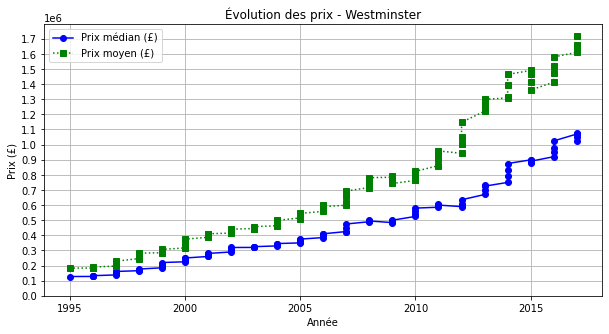

In [68]:
# Sélectionner un borough spécifique (ex : "Westminster")
borough = "Westminster"
df_borough = medianes[medianes["Area"] == borough]

# Séparer les types de mesures
df_median = df_borough[df_borough["Measure"] == "Median"]
df_mean = df_borough[df_borough["Measure"] == "Mean"]

# Assurer que les valeurs sont en type float (au cas où il y a des virgules)
df_median["Value"] = df_median["Value"].replace({',': ''}, regex=True).astype(float)
df_mean["Value"] = df_mean["Value"].replace({',': ''}, regex=True).astype(float)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 5))

# Tracer les prix médian et moyen
ax.plot(df_median["Year"], df_median["Value"], color='blue', marker='o', label="Prix médian (£)")
ax.plot(df_mean["Year"], df_mean["Value"], color='green', marker='s', linestyle="dotted", label="Prix moyen (£)")

# Mettre des ticks d'années tous les 5 ans
ax.set_xticks(np.arange(df_borough["Year"].min(), df_borough["Year"].max() + 1, 5))

# Limiter les ticks des prix tous les 50 000 £
prix_max = df_borough[df_borough["Measure"].isin(["Median", "Mean"])]["Value"].max()
ax.set_yticks(np.arange(0, prix_max + 50000, 100000))

# Ajouter les labels
ax.set_xlabel("Année")
ax.set_ylabel("Prix (£)")
ax.set_title(f"Évolution des prix - {borough}")
ax.legend()

# Affichage
plt.grid()
plt.show()



In [70]:
# Afficher les valeurs uniques dans la colonne "Area"
aires_uniques = medianes["Area"].unique()
print(aires_uniques)

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster' 'North East' 'North West' 'Yorkshire And The Humber'
 'East Midlands' 'West Midlands' 'East of England' 'London' 'South East'
 'South West' 'England' 'Wales' 'England And Wales']


In [76]:
# Créer un widget de sélection pour le quartier
dropdown = widgets.Dropdown(
    options=medianes["Area"].unique(),
    description='Quartier:',
    disabled=False
)

# Fonction pour mettre à jour le graphe en fonction du quartier sélectionné
def update_graph(quartier):
    # Filtrer les données pour le quartier sélectionné
    df_quartier = medianes[medianes["Area"] == quartier]
    
    # Créer le graphique interactif
    fig = px.line(df_quartier, x="Year", y="Value", color="Measure",
                  title=f"Évolution des prix à {quartier}",
                  labels={"Value": "Prix (£)", "Year": "Année"})
    
    fig.show()

# Afficher le widget et initialiser le graphe
widgets.interactive(update_graph, quartier=dropdown)

interactive(children=(Dropdown(description='Quartier:', options=('City of London', 'Barking and Dagenham', 'Ba…